## Covariance and Correlation

Covariance means how two variables vary in tandem from their means.

For example, let's say we work for an e-commerce company, and they are interested in finding a correlation between page speed(how fast each web page renders) and how much a customer spends.

First let's just make page speed and purchase amount totally random and independent of each other; a very small covariance will result as there is no real correlation

In [11]:
%pip install seaborn

  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/7b/e5/83fcd7e9db036c179e0352bfcd20f81d728197a16f883e7b90307a88e65e/seaborn-0.13.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/294.6 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/294.6 kB 1.4 MB/s eta 0:00:01
   -------- ------------------------------ 61.4/294.6 kB 825.8 kB/s eta 0:00:01
   ---------------- ----------------------- 122.9/294.6 kB 1.0 MB/s eta 0:00:01
   ---------------------- ----------------- 163.8/294.6 kB 1.1 MB/s eta 0:00:01
   ------------------------------ --------- 225.3/294.6 kB 1.1 MB/s eta 0:00:01
   -------------------------------------- - 286.7/294.6 kB 1.1 MB/s eta 0:00:01
   ---------------------------------------- 294.6/294.6 kB 1.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import matplotlib.pyplot as plt

0.4311521857835529

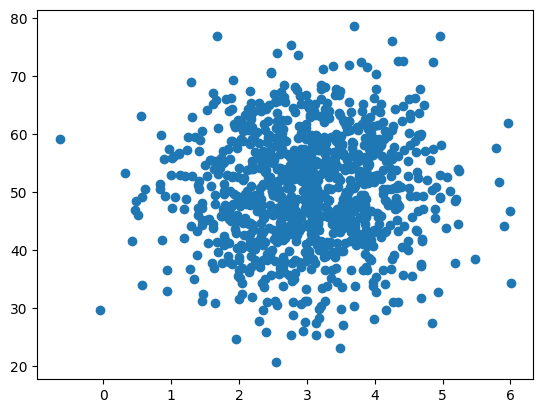

In [15]:


def de_mean(x):
    xmean = np.mean(x)
    return [x1 - xmean for x1 in x]

def covariance(x, y):
    n = len(x)
    return np.dot(de_mean(x), de_mean(y)) / (n-1)

pageSpeeds = np.random.normal(3.0, 1.0, 1000)
purchaseAmount = np.random.normal(50.0, 10.0, 1000)

plt.scatter(pageSpeeds, purchaseAmount)

covariance(pageSpeeds, purchaseAmount)

# There is no real relationship between these two variables

-4.829873567887118

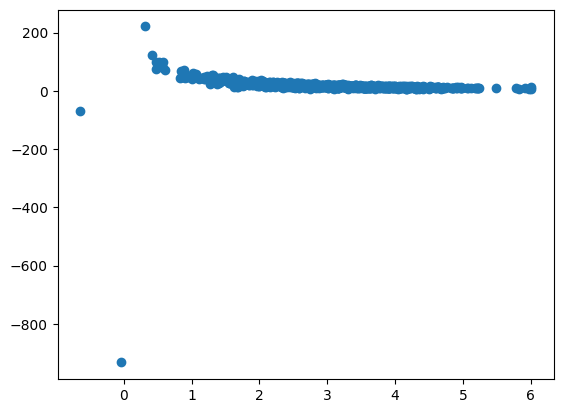

In [16]:
purchaseAmount = np.random.normal(50.0, 10.0, 1000) / pageSpeeds

plt.scatter(pageSpeeds, purchaseAmount)

covariance(pageSpeeds, purchaseAmount)

Covariance is sensitive to the units used in the variables, which makes it difficult to interpret. Correlation normalizes everything by their standard deviations, giving you an easier to understand value that ranges from -1 (for a perfect inverse correlation) to 1 (for a perfect positive correlation)

In [18]:
def correlation(x,y):
    stddevx = x.std()
    stddevy = y.std()
    return covariance(x,y) / stddevx / stddevy # in real life, you'd check for divide by 0 here

correlation(pageSpeeds, purchaseAmount) # it shows -0.15, it is not perfect line


-0.15253417986306592

In [20]:
np.corrcoef(pageSpeeds, purchaseAmount)

array([[ 1.        , -0.15238165],
       [-0.15238165,  1.        ]])

It doesn't match exactly just due to the math precision available on a computer. We can force a perfect correlation by fabricating a totally linear relationship

-1.0010010010010013

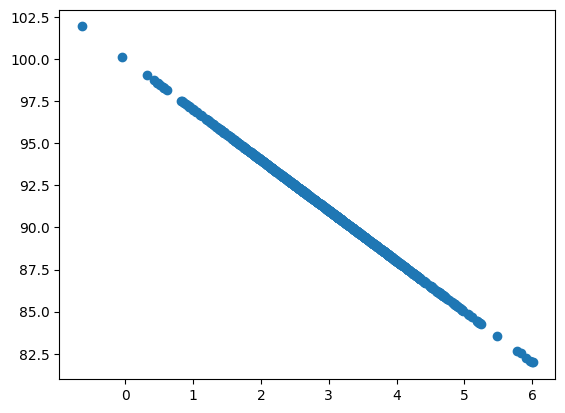

In [21]:
purchaseAmount = 100 - pageSpeeds * 3

plt.scatter(pageSpeeds, purchaseAmount)

correlation(pageSpeeds, purchaseAmount)